# Data Preparation

In [28]:
from helpers.helper_functions import read_and_set_df, set_datatypes, get_plotly_colors, pd, np, msno, make_subplots, go, plt, sns, train_test_split, LinearRegression, IterativeImputer, KNNImputer, OneHotEncoder, make_pipeline, StandardScaler, LogisticRegression

In [29]:
df = read_and_set_df('data/train.csv')

set_datatypes(df)

C:\Users\aster\AppData\Local\Temp/ipykernel_22112/483987463.py:1: DtypeWarning:

Columns (3,5,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380999 non-null  float64 
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380999 non-null  Int64   
 9   policy_sales_channel  380999 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380999 non-null  category
dtypes: Int64(4), category(6), float64(1), int64(1)
memory usage: 24.0 MB


## Missing Values

Die Funktion `heatmap()` von `missingno` misst die Nullkorrelation: wie stark das Vorhandensein oder Fehlen einer Variable das Vorhandensein einer anderen Variable beeinflusst.

Die Nullkorrelation reicht von -1 (wenn eine Variable auftritt, tritt die andere definitiv nicht auf) über 0 (auftauchende oder nicht auftauchende Variablen haben keinen Einfluss aufeinander) bis 1 (wenn eine Variable auftritt, tritt die andere definitiv auf).


In [31]:
# Count Missing Values per Variable und in DataFrame überführen
y_count_mv = pd.DataFrame(df.isnull().sum())
y_count_mv.columns = ['count']
y_count_mv.index.names = ['Name']
y_count_mv['Name'] = y_count_mv.index
y_count_mv =  y_count_mv[y_count_mv['count'] != 0]
y_count_mv.sort_values(by=['count'], inplace = True, ascending=True)


missing_values = pd.DataFrame(y_count_mv['count'] / len(df) * 100)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values.sort_values(by=['count'], inplace = True, ascending=True)

x = y_count_mv['Name']

# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=missing_values['count'],
    y=x,
    marker=dict(
        color='rgba(18, 63, 90, 0.95)',
        line=dict(
            color='rgba(18, 63, 90, 1.0)',
            width=1),
    ),
    name='Relative Anzahl der fehlenden Werte (%)',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_count_mv['count'], y=x,
    mode='lines+markers',
    line_color='rgb(0, 68, 27)',
    name='Absolute Anzahl der fehlenden Werte',
), 1, 2)

fig.update_layout(
    title='Absolute und relative Anzahl der Missing Values je Variable',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=2000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(missing_values['count'], decimals=2)
y_nw = np.rint(y_count_mv['count'])

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+500,
                            text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 68, 27)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+ 0.15,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(18, 63, 90)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

### Verteilung der Missing Values 

<AxesSubplot:>

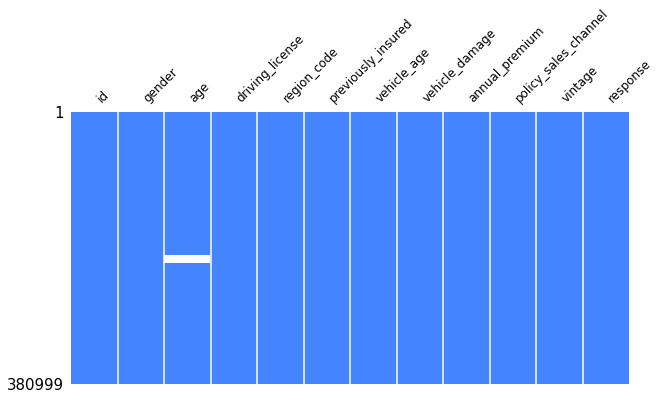

In [32]:
# Verteilung der Missing Values innerhalb der Variablen 
msno.matrix(df, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

<AxesSubplot:>

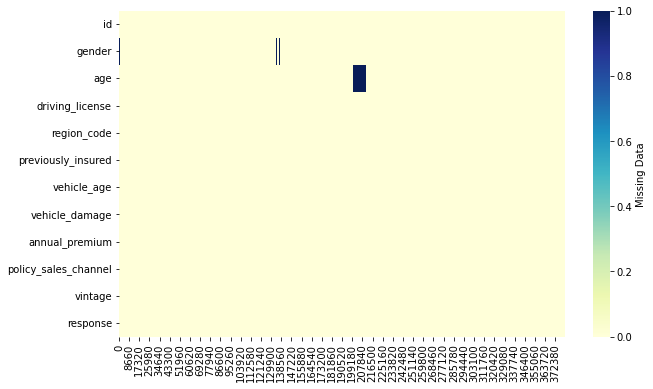

In [33]:

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


<AxesSubplot:>

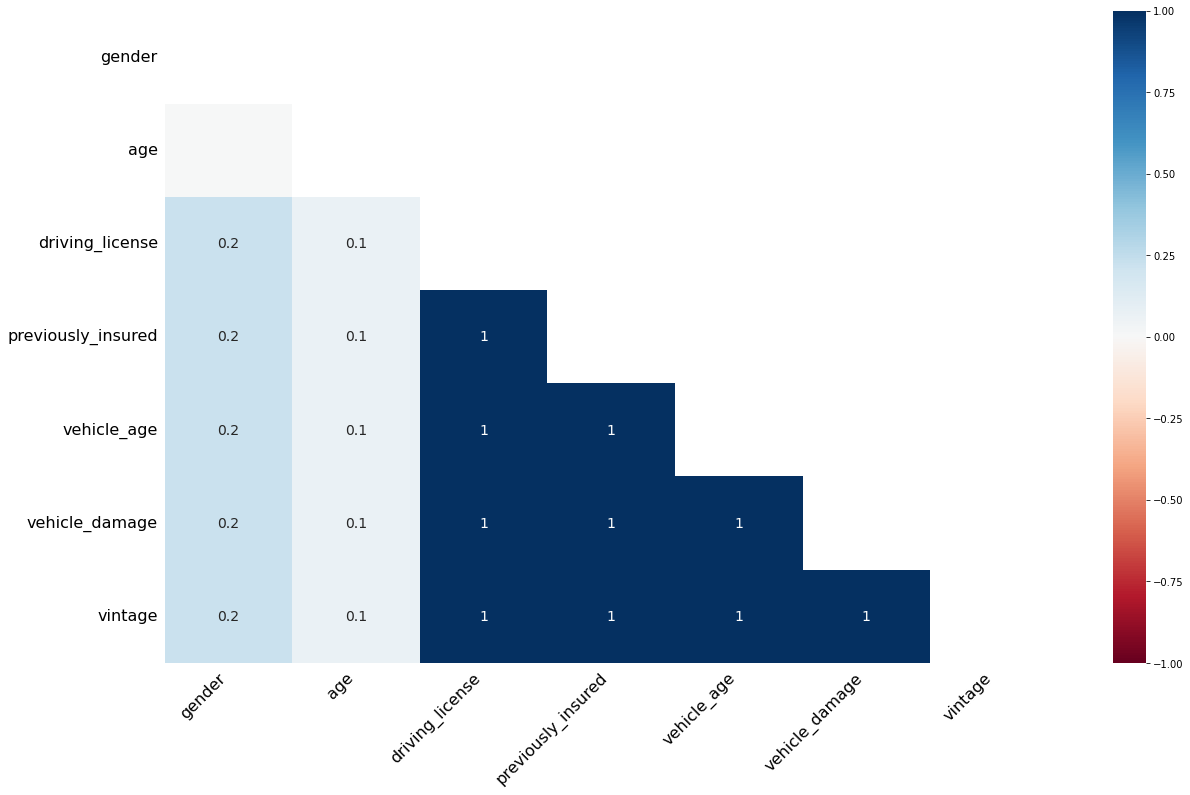

In [34]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df)



Um dieses Diagramm zu interpretieren, lesen Sie es aus einer Top-Down-Perspektive. Clusterblätter, die in einem Abstand von Null miteinander verbunden sind, sagen das Vorhandensein des jeweils anderen vollständig voraus - eine Variable könnte immer leer sein, wenn eine andere gefüllt ist, oder sie könnten immer beide gefüllt oder beide leer sein, und so weiter. In diesem speziellen Beispiel klebt das Dendrogramm die Variablen zusammen, die erforderlich und daher in jedem Datensatz vorhanden sind.

Clusterblätter, die sich in der Nähe von Null aufspalten, aber nicht bei Null, sagen sich gegenseitig sehr gut, aber immer noch unvollkommen voraus. Wenn Ihre eigene Interpretation des Datensatzes darin besteht, dass diese Spalten tatsächlich in Null übereinstimmen oder übereinstimmen sollten (z. B. als BETEILIGUNGSFAKTOR FAHRZEUG 2 und FAHRZEUG-TYPCODE 2), dann sagt Ihnen die Höhe des Clusterblatts in absoluten Zahlen, wie oft die Datensätze "nicht übereinstimmen" oder falsch abgelegt sind - d. h. wie viele Werte Sie ausfüllen oder streichen müssten, wenn Sie dazu geneigt sind.

Beschreibung: 
Das Dendrogramm verwendet einen hierarchischen Clustering-Algorithmus, um die Variablen anhand ihrer Nullkorrelation gegeneinander abzugrenzen. 


Erklärung: 
Clutster, die sich in bei Null aufspalten, sagen sich untereinander vollkommen voraus (Korrelation von 1). Auf Grundlage 

Auf jeder Stufe des Baums werden die Variablen auf der Grundlage der Kombination aufgeteilt, die den Abstand der verbleibenden Cluster minimiert.  

Je monotoner die Variablen sind, desto näher liegt ihr Gesamtabstand bei Null und desto näher liegt ihr durchschnittlicher Abstand (die y-Achse) bei Null.   

<AxesSubplot:>

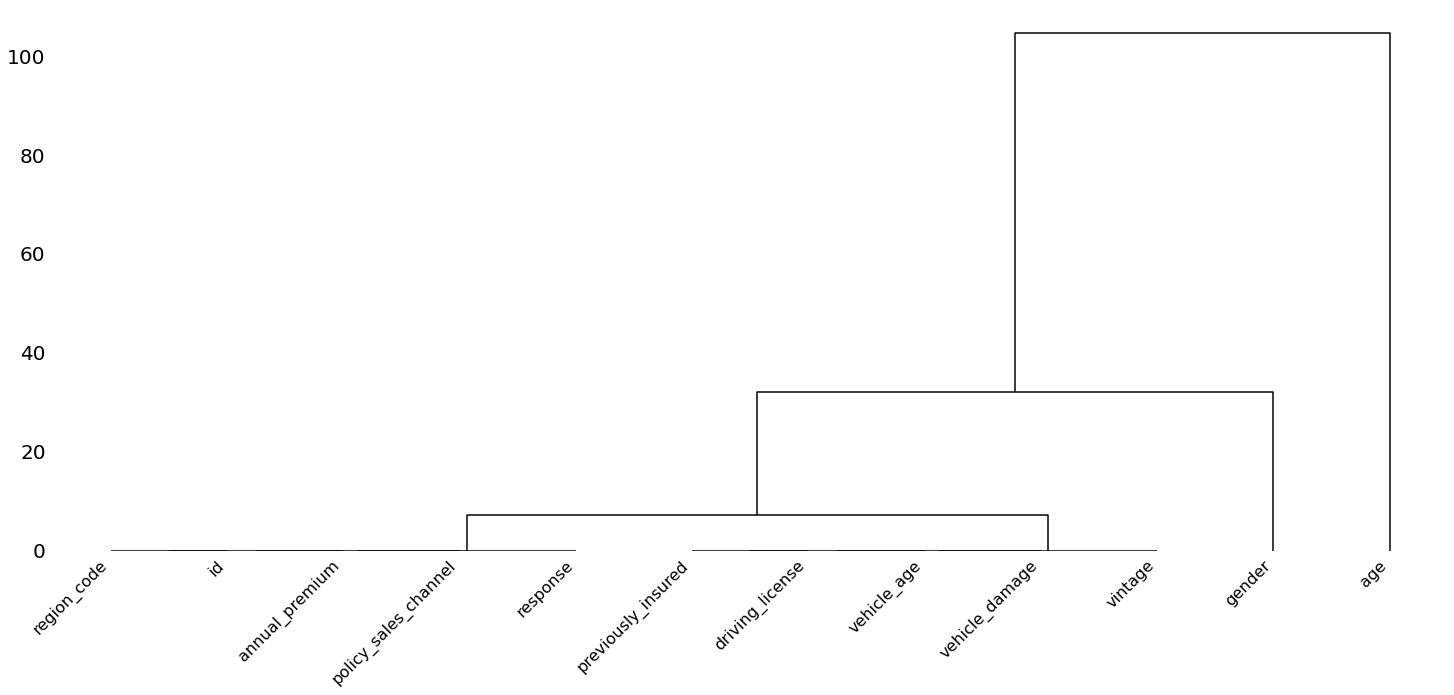

In [35]:
msno.dendrogram(df, orientation='top')

In [36]:
# Verteilung der Missing Values innerhalb der Variablen 
#msno.matrix(df, freq='Tim', sparkline=False)
#df.iloc[:, 0]
#msno.matrix(df.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

In [37]:
# Drop all rows with NaNs in A OR B

#x = df.dropna(subset=['previously_insured', 'driving_license', 'vehicle_age', 'vehicle_damage', 'vintage'])


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380999 non-null  float64 
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380999 non-null  Int64   
 9   policy_sales_channel  380999 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380999 non-null  category
dtypes: Int64(4), category(6), float64(1), int64(1)
memory usage: 32.0 MB


In [38]:
df_na_bool = pd.DataFrame(pd.isna(df))

df.drop(df_na_bool[(df_na_bool['previously_insured'] == True) & 
           (df_na_bool['driving_license'] == True) &
           (df_na_bool['vehicle_age'] == True) &
           (df_na_bool['vehicle_damage'] == True) &
           (df_na_bool['vintage'] == True)].index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380948 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380948 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380948 non-null  float64 
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380948 non-null  Int64   
 9   policy_sales_channel  380948 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380948 non-null  category
dtypes: Int64(4), category(6), float64(1), int64(1)
memory usage: 24.0 MB


In [39]:
pd.isna(df).sum()

id                          0
gender                   1000
age                     10841
driving_license             0
region_code                 0
previously_insured          0
vehicle_age                 0
vehicle_damage              0
annual_premium              0
policy_sales_channel        0
vintage                     0
response                    0
dtype: int64

Listenweiser Fallausschluss - Wir haben mittels dem listenweisen Fallausschluss 51 Zeilen aus dem Datensatz entfernt. Dabei haben wir ebenfalls die Anzahl der missing values bei den Variablen von age und gender um 51 Werte reduziert.

## Behandlung von Anomalien

### Age

- Untergrenze: 18
- Obergrenze: 100

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380948 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380948 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380948 non-null  float64 
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380948 non-null  Int64   
 9   policy_sales_channel  380948 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380948 non-null  category
dtypes: Int64(4), category(6), float64(1), int64(1)
memory usage: 24.0 MB


In [41]:
index_max_age = df[df["age"] >= 100].index
df.drop(index_max_age, inplace=True)

index_min_age = df[df["age"] < 18].index
df.drop(index_min_age, inplace=True)

df["age"].describe()

count    370007.000000
mean         38.820579
std          15.509008
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: age, dtype: float64

### Annual Premium

- Untergrenze: 0
- Obergrenze: 150.000

In [42]:
index_min_premium = df[df["annual_premium"] <= 0].index
df.drop(index_min_premium, inplace=True)

index_max_premium = df[df["annual_premium"] >= 150000].index
df.drop(index_max_premium, inplace=True)

df["annual_premium"].describe()

count    380290.000000
mean      30452.227190
std       16371.775769
min        2630.000000
25%       24397.000000
50%       31661.000000
75%       39384.000000
max      147075.000000
Name: annual_premium, dtype: float64

## Imputationverfahren für die Variable Age

<AxesSubplot:ylabel='Density'>

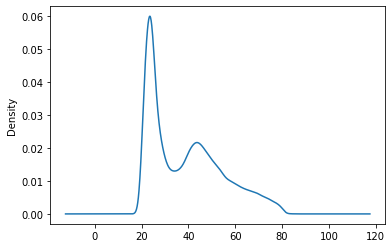

In [43]:
df['age'].plot.density()

#### Mittelwertersetzung

<AxesSubplot:ylabel='Density'>

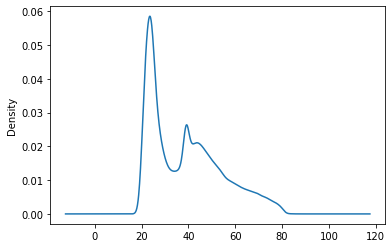

In [44]:
imp_mean_res = df['age'].fillna(round(df['age'].mean(),0)).astype('Int64')

imp_mean_res.plot.density()

#### Lineare Regression

In [60]:
df_linear_model_data = df[['age', 'annual_premium']].dropna()

X_train, X_test, y_train, y_test = train_test_split(df_linear_model_data.drop('age', axis=1), df_linear_model_data[['age']], test_size = 0.2, random_state=42)

imp_reg = LinearRegression().fit(X_train, y_train)

imp_reg_results = imp_reg.predict(X_test)
imp_reg_results

array([[38.76537925],
       [37.06280345],
       [37.06280345],
       ...,
       [37.06280345],
       [39.60917633],
       [40.18698562]])

In [ ]:
df.to_csv('./data/clean_data.csv', sep="$", decimal=".")